In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


In [2]:
#wine=pd.read_csv('/cxldata/datasets/project/wine_quality_red.csv')
wine=pd.read_csv('wine_quality_red.csv')

In [3]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [5]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)
for train_index, test_index in split.split(wine, wine["quality"]):
    strat_train_set = wine.loc[train_index]
    strat_test_set = wine.loc[test_index]

In [6]:
strat_train_set

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
686,7.1,0.650,0.18,1.8,0.070,13.0,40.0,0.99700,3.44,0.60,9.1,5
58,7.8,0.590,0.18,2.3,0.076,17.0,54.0,0.99750,3.43,0.59,10.0,5
400,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,5
1335,6.6,0.580,0.02,2.4,0.069,19.0,40.0,0.99387,3.38,0.66,12.6,6
1256,7.5,0.590,0.22,1.8,0.082,43.0,60.0,0.99499,3.10,0.42,9.2,5
...,...,...,...,...,...,...,...,...,...,...,...,...
980,9.1,0.500,0.30,1.9,0.065,8.0,17.0,0.99774,3.32,0.71,10.5,6
507,11.2,0.670,0.55,2.3,0.084,6.0,13.0,1.00000,3.17,0.71,9.5,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1166,9.9,0.540,0.26,2.0,0.111,7.0,60.0,0.99709,2.94,0.98,10.2,5


In [7]:
strat_test_set

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1460,6.4,0.42,0.09,2.3,0.054,34.0,64.0,0.99724,3.41,0.68,10.4,6
691,9.2,0.92,0.24,2.6,0.087,12.0,93.0,0.99980,3.48,0.54,9.8,5
1074,7.5,0.77,0.20,8.1,0.098,30.0,92.0,0.99892,3.20,0.58,9.2,5
1576,8.0,0.30,0.63,1.6,0.081,16.0,29.0,0.99588,3.30,0.78,10.8,6
435,12.3,0.39,0.63,2.3,0.091,6.0,18.0,1.00040,3.16,0.49,9.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
972,10.1,0.38,0.50,2.4,0.104,6.0,13.0,0.99643,3.22,0.65,11.6,7
786,9.9,0.35,0.41,2.3,0.083,11.0,61.0,0.99820,3.21,0.50,9.5,5
1560,7.8,0.60,0.26,2.0,0.080,31.0,131.0,0.99622,3.21,0.52,9.9,5


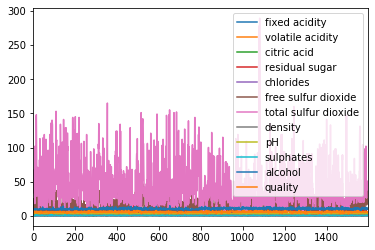

In [8]:
wine.plot()

In [9]:
plt.show()

In [56]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


In [41]:
reg=linear_model.LinearRegression()

In [58]:
standardscaler=StandardScaler()


In [42]:
x_train=strat_train_set.drop('quality', axis=1)
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
686,7.1,0.650,0.18,1.8,0.070,13.0,40.0,0.99700,3.44,0.60,9.1
58,7.8,0.590,0.18,2.3,0.076,17.0,54.0,0.99750,3.43,0.59,10.0
400,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.99940,3.47,0.53,9.9
1335,6.6,0.580,0.02,2.4,0.069,19.0,40.0,0.99387,3.38,0.66,12.6
1256,7.5,0.590,0.22,1.8,0.082,43.0,60.0,0.99499,3.10,0.42,9.2
...,...,...,...,...,...,...,...,...,...,...,...
980,9.1,0.500,0.30,1.9,0.065,8.0,17.0,0.99774,3.32,0.71,10.5
507,11.2,0.670,0.55,2.3,0.084,6.0,13.0,1.00000,3.17,0.71,9.5
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2
1166,9.9,0.540,0.26,2.0,0.111,7.0,60.0,0.99709,2.94,0.98,10.2


In [43]:
y_train=strat_train_set[['quality']]
y_train

,quality
686,5
58,5
400,5
1335,6
1256,5
...,...
980,6
507,6
1597,5
1166,5


In [44]:
reg.fit(x_train,y_train,)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
reg.coef_

array([[-7.48489990e-03, -1.15043657e+00, -2.33623570e-01,
         2.90438780e-03, -1.53801549e+00,  5.96109748e-03,
        -3.74812615e-03,  5.83098876e+00, -6.77826341e-01,
         7.33054796e-01,  3.01568168e-01]])

In [46]:
x_test=strat_test_set.drop('quality', axis=1)


In [63]:
y_test=strat_test_set['quality']

In [64]:
y_predict_scaled=reg.predict(x_test)

In [65]:
y_predict_scaled

array([[5.85140814],
       [4.61437652],
       [4.95215651],
       [6.09221663],
       [5.44139085],
       [5.99029025],
       [5.15989595],
       [5.12851657],
       [5.41384027],
       [5.88803176],
       [5.60154422],
       [5.44977848],
       [5.29151112],
       [5.30772364],
       [5.27729392],
       [5.92338437],
       [5.44104974],
       [5.32146715],
       [5.0953548 ],
       [5.48363012],
       [6.0463519 ],
       [5.57686439],
       [6.48495004],
       [6.11521142],
       [5.44932345],
       [6.08412559],
       [6.34886924],
       [5.2683959 ],
       [6.57904227],
       [5.45655462],
       [6.04837917],
       [5.40612281],
       [5.36447112],
       [5.37117608],
       [6.50669632],
       [5.41582462],
       [4.45629568],
       [5.68549982],
       [5.47226767],
       [4.8374105 ],
       [6.10080123],
       [4.77075408],
       [5.74904907],
       [5.75407827],
       [5.93658844],
       [6.57904227],
       [4.99974923],
       [5.440

In [66]:
msq_err=mean_squared_error(reg.predict(x_train),y_train)

In [67]:
msq_err

0.41970544796280596

In [68]:
gen_err=mean_squared_error(reg.predict(x_test),y_test)
gen_err

0.41374730058758097

In [69]:
p_value=pd.DataFrame(list(zip(y_test,y_predict_scaled)), columns=['target','predicted'])

In [70]:
p_value

,target,predicted
0,6,[5.851408137404714]
1,5,[4.61437651706018]
2,5,[4.952156514206956]
3,6,[6.0922166282890995]
4,5,[5.441390845270176]
...,...,...
395,5,[5.06581402088546]
396,7,[6.185533236724359]
397,5,[5.398320495354961]
398,5,[5.145812033524951]
